In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
print(os.getcwd())

/Users/emmyson/HP_KNN


In [3]:
filename = os.path.join(os.getcwd(),'house-prices-advanced-regression-techniques','train.csv')

In [4]:
df = pd.read_csv(filename, header = 0)

In [5]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [6]:
df.shape

(1460, 81)

In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

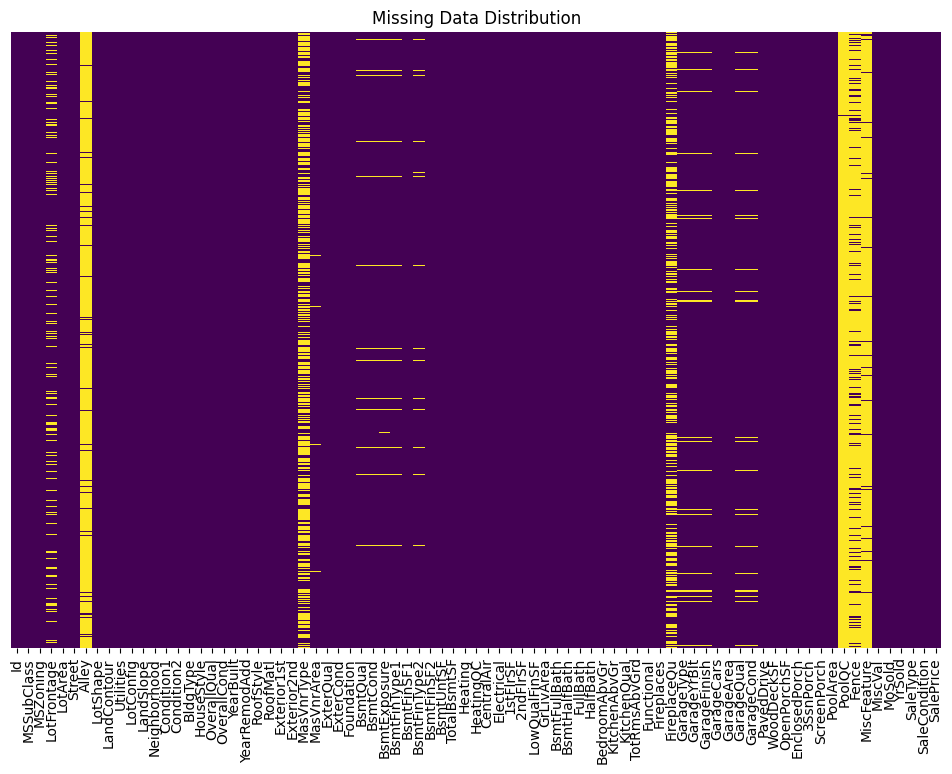

In [9]:
# Visualize missing data
missing_data = df.isnull()

plt.figure(figsize=(12, 8))
# Create heatmap using the missing_data 
sns.heatmap(missing_data, cbar=False, cmap='viridis', yticklabels=False, xticklabels=True)

# Display the plot
plt.title("Missing Data Distribution")
plt.show()


In [10]:
# Drop columns with high missingness, not informative to model
high_missingness_col = ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
df.drop(high_missingness_col, axis = 1, inplace = True)

In [11]:
# Handle missingness of data
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 75, dtype: int64

In [12]:
df.shape

(1460, 75)

In [13]:
condition = nan_count != 0 # look for all columns with missing values

col_names = nan_count[condition].index # get the column names
print(col_names)

Index(['LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')


In [14]:
nan_col = list(col_names)

In [15]:
nan_col_types = df[nan_col].dtypes
nan_col_types

LotFrontage     float64
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
dtype: object

In [16]:
# Replace the missing values in float64 type columns with the mean
float_nan_col = nan_col_types[nan_col_types == 'float64'].index.tolist()
float_nan_col

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [17]:
for col in float_nan_col:
    mean = df[col].mean()
    df[col].fillna(value = mean, inplace = True)

In [18]:
# Replace missing values in object type columns with placeholder ('missing')
obj_nan_col = nan_col_types[nan_col_types == 'object'].index.tolist()
obj_nan_col

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [19]:
for col in obj_nan_col:
    df[col].fillna(value = 'missing', inplace = True)

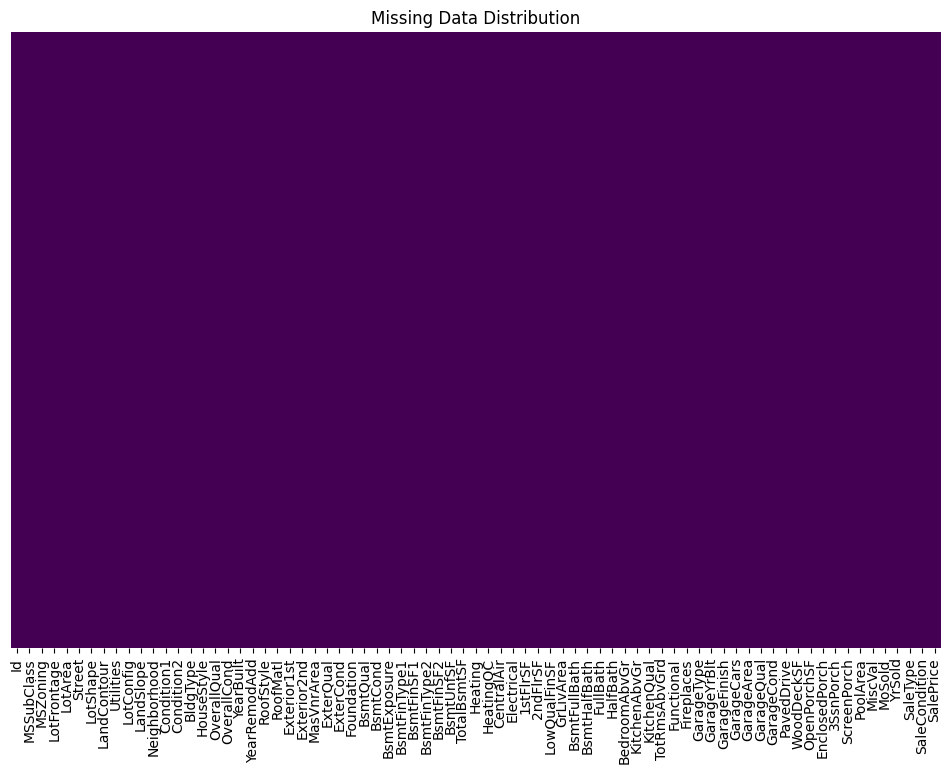

In [20]:
# Verify missing data is handled
missing_data_check = df.isnull()

plt.figure(figsize=(12, 8))
# Create heatmap using the missing_data 
sns.heatmap(missing_data_check, cbar=False, cmap='viridis', yticklabels=False, xticklabels=True)

# Display the plot
plt.title("Missing Data Distribution")
plt.show()

In [21]:
obj_columns = list(df.select_dtypes(include = ['object']).columns)
obj_columns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [22]:
obj_nunique_counts = df[obj_columns].nunique()
obj_nunique_counts

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          5
BsmtCond          5
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
Heating           6
HeatingQC         5
CentralAir        2
Electrical        6
KitchenQual       4
Functional        7
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

In [23]:
#For columns with low nunique count: 2-8, implement one-hot encoding
#For columns with med-high nunique count: 8+, implement target encoding

low_nunique = obj_nunique_counts[obj_nunique_counts <= 8].index.tolist()
high_nunique = obj_nunique_counts[obj_nunique_counts > 8].index.tolist()

In [24]:
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder
enc = OneHotEncoder(sparse_output = False)
fitted = enc.fit_transform(df[low_nunique])
df_enc = pd.DataFrame(data = fitted, columns=enc.get_feature_names_out(low_nunique))

In [25]:
df_enc.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,GarageCond_missing,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
df_enc.head(10)

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,GarageCond_missing,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
df.drop(columns = low_nunique, axis = 1, inplace = True)

In [28]:
df = df.join(df_enc)

In [29]:
df.shape

(1460, 209)

In [30]:
print(high_nunique)

['Neighborhood', 'Condition1', 'Exterior1st', 'Exterior2nd', 'SaleType']


In [31]:
obj_nunique_counts[obj_nunique_counts > 8]

Neighborhood    25
Condition1       9
Exterior1st     15
Exterior2nd     16
SaleType         9
dtype: int64

In [32]:
#implement target-encoding for all obj_col with 8+ nunique counts:
import pandas as pd
from sklearn.model_selection import KFold
import numpy as np

# Define the target column
target = 'SalePrice'

high_cardinality_cols = ['Neighborhood', 'Condition1', 'Exterior1st', 'Exterior2nd', 'SaleType']

df_encoded = df.copy()

# Initialize KFold for safe target encoding
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform target encoding for each high-cardinality column
for col in high_cardinality_cols:
    df_encoded[col + '_encoded'] = 0
    
    for train_idx, val_idx in kf.split(df):
        train_data, val_data = df.iloc[train_idx], df.iloc[val_idx]
        
        category_means = train_data.groupby(col)[target].mean()
        
        df_encoded.loc[val_idx, col + '_encoded'] = df.loc[val_idx, col].map(category_means)
    
    df_encoded[col + '_encoded'].fillna(df[target].mean(), inplace=True)

df_encoded.drop(columns=high_cardinality_cols, inplace=True)

print(df_encoded.head())

   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleCondition_AdjLand  \
0          2003       196.0         706  ...                    0.0   
1          1976         0.0         978  ...                    0.0   
2          2002       162.0         486  ...                    0.0   
3          1970         0.0         216  ...                    0.0   
4          2000       350.0         655  ...                    0.0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                   0

In [33]:
df_encoded.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'Neighborhood_encoded',
       'Condition1_encoded', 'Exterior1st_encoded', 'Exterior2nd_encoded',
       'SaleType_encoded'],
      dtype='object', length=209)

In [34]:
# Verify object columns are transformed
df_encoded.select_dtypes(include = ['object'])

""
0
1
2
3
4
...
1455
1456
1457
1458


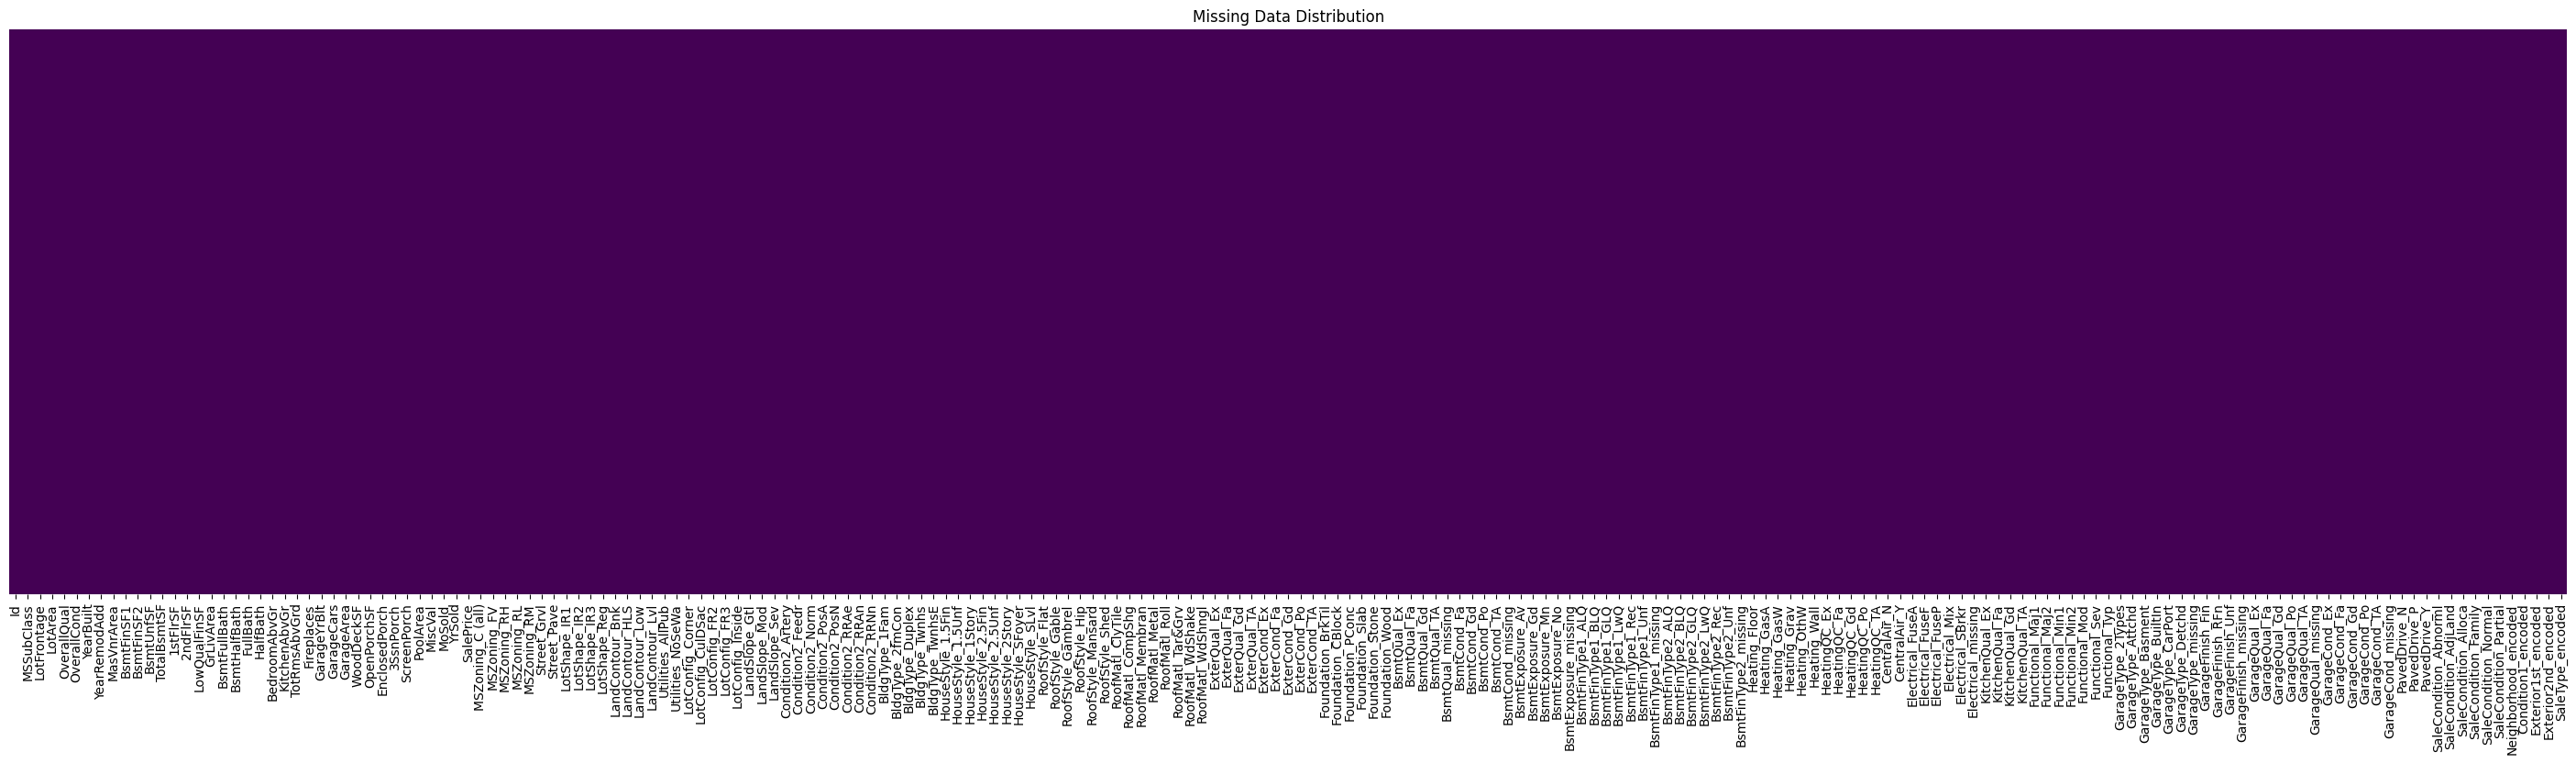

In [35]:
missing_data_check2 = df_encoded.isnull()

plt.figure(figsize=(36, 8))
sns.heatmap(missing_data_check2, cbar=False, cmap='viridis', yticklabels=False, xticklabels=True)

plt.title("Missing Data Distribution")
plt.show()

In [36]:
# Handle outliers:
from scipy.stats import mstats

columns = df_encoded.columns.tolist()
for col in columns:
    df_encoded[col] = mstats.winsorize(df_encoded[col], limits = [0.01, 0.01])

In [37]:
# feature engineer with correlation analysis
corr_matrix = df_encoded.corr()

In [38]:
correlation_with_target = corr_matrix['SalePrice'].sort_values(ascending=False)
print(correlation_with_target)

SalePrice                1.000000
OverallQual              0.809808
Neighborhood_encoded     0.743447
GrLivArea                0.721656
GarageCars               0.665416
                           ...   
GarageCond_Ex                 NaN
GarageCond_Gd                 NaN
GarageCond_Po                 NaN
SaleCondition_AdjLand         NaN
SaleCondition_Alloca          NaN
Name: SalePrice, Length: 209, dtype: float64


In [39]:
# columns with the same values for all rows will have a NaN correlation value with the label, 'SalePrice'
# opt to drop these columns since constant columns do not provide any insight and adds noise
constant_columns = df_encoded.columns[df_encoded.nunique() == 1].tolist()
print(constant_columns)

['PoolArea', 'MSZoning_C (all)', 'Street_Grvl', 'Street_Pave', 'LotShape_IR3', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_FR3', 'LandSlope_Sev', 'Condition2_Artery', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'RoofStyle_Flat', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'ExterQual_Fa', 'ExterCond_Ex', 'ExterCond_Po', 'Foundation_Stone', 'Foundation_Wood', 'BsmtCond_Po', 'BsmtFinType2_GLQ', 'Heating_Floor', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'HeatingQC_Po', 'Electrical_FuseP', 'Electrical_Mix', 'Electrical_missing', 'Functional_Maj1', 'Functional_Maj2', 'Functional_Sev', 'GarageType_2Types', 'GarageType_CarPort', 'GarageQual_Ex', 'GarageQual_Gd', 'GarageQual_Po', 'GarageCond_Ex', 'Gara

In [40]:
df_encoded.drop(columns = constant_columns, axis = 1, inplace = True)

In [41]:
df_encoded.shape

(1460, 151)

In [42]:
# Recompute corr_matrix:
corr_matrix = df_encoded.corr()
correlation_with_target = corr_matrix[['SalePrice']].sort_values(by = 'SalePrice', ascending=False)
print(correlation_with_target)

                      SalePrice
SalePrice              1.000000
OverallQual            0.809808
Neighborhood_encoded   0.743447
GrLivArea              0.721656
GarageCars             0.665416
...                         ...
GarageType_Detchd     -0.370891
GarageFinish_Unf      -0.428149
BsmtQual_TA           -0.470826
KitchenQual_TA        -0.540762
ExterQual_TA          -0.611821

[151 rows x 1 columns]


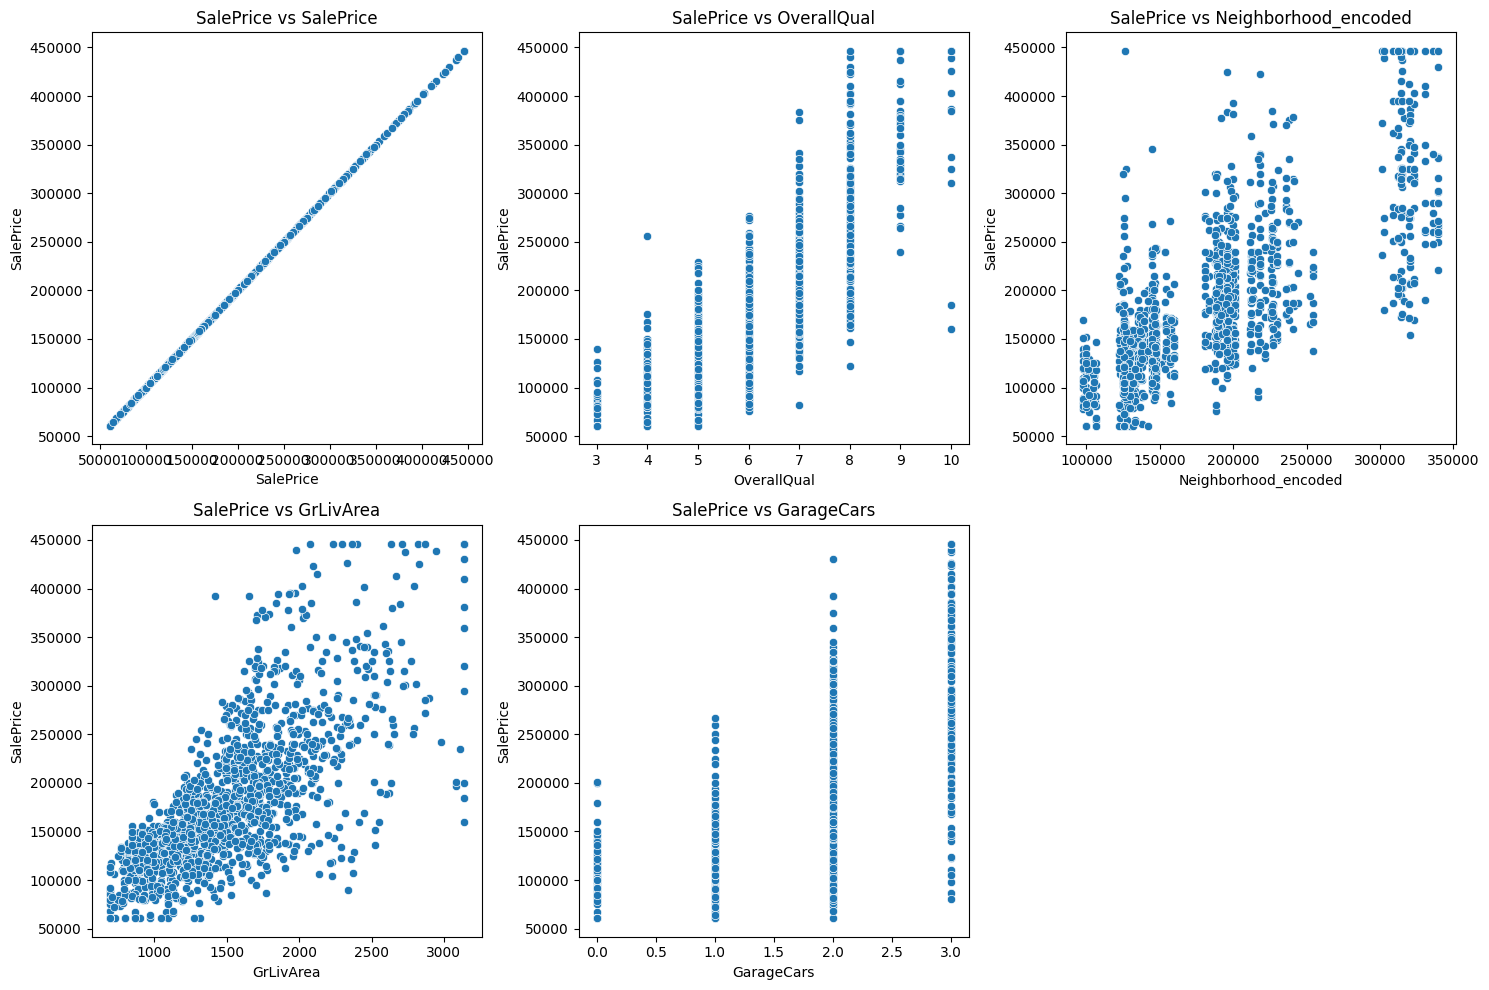

In [43]:
# plot the top 5 more correlated values:

high_corr_features = corr_matrix[['SalePrice']].sort_values(by='SalePrice', ascending=False).index[:5]  # Top 5 correlated features

# Create scatter plots for each of these features
plt.figure(figsize=(15, 10))  # Set the figure size
for i, feature in enumerate(high_corr_features):
    plt.subplot(2, 3, i+1)  # Create a grid of subplots
    sns.scatterplot(x=df_encoded[feature], y=df_encoded['SalePrice'])  # Scatter plot for each feature
    plt.title(f"SalePrice vs {feature}")
    plt.xlabel(feature)
    plt.ylabel('SalePrice')

# Adjust layout
plt.tight_layout()
plt.show()


In [44]:
corr_with_target = correlation_with_target.dropna()
print(corr_with_target)

                      SalePrice
SalePrice              1.000000
OverallQual            0.809808
Neighborhood_encoded   0.743447
GrLivArea              0.721656
GarageCars             0.665416
...                         ...
GarageType_Detchd     -0.370891
GarageFinish_Unf      -0.428149
BsmtQual_TA           -0.470826
KitchenQual_TA        -0.540762
ExterQual_TA          -0.611821

[151 rows x 1 columns]


In [45]:
# Drop columns with correlation values between: -0.1 <= corr <= 0.1
col_to_drop = corr_with_target[(corr_with_target > -0.1) & (corr_with_target < 0.1)].dropna()
col_to_drop = col_to_drop.index.tolist()
col_to_drop

['MSZoning_FV',
 'BsmtCond_Gd',
 'Heating_GasA',
 'MoSold',
 '3SsnPorch',
 'LandContour_Low',
 'BsmtExposure_Mn',
 'LandSlope_Mod',
 'BsmtFinType2_ALQ',
 'Condition2_Norm',
 'BldgType_TwnhsE',
 'LotConfig_Corner',
 'LotConfig_FR2',
 'Heating_GasW',
 'BsmtFinSF2',
 'Functional_Mod',
 'BsmtHalfBath',
 'Id',
 'GarageType_Basment',
 'YrSold',
 'LandContour_Lvl',
 'BsmtFinType2_LwQ',
 'HouseStyle_SLvl',
 'LowQualFinSF',
 'BsmtFinType2_Rec',
 'SaleCondition_Family',
 'LandSlope_Gtl',
 'ExterCond_Gd',
 'HouseStyle_1Story',
 'BsmtFinType2_BLQ',
 'MiscVal',
 'Functional_Min1',
 'MSZoning_RH',
 'Functional_Min2',
 'LotConfig_Inside',
 'BsmtFinType1_Unf',
 'OverallCond',
 'BsmtFinType1_LwQ',
 'MSSubClass',
 'RoofMatl_CompShg',
 'PavedDrive_P',
 'HouseStyle_SFoyer']

In [46]:
df_encoded.drop(col_to_drop, axis = 1, inplace = True)

In [47]:
df_encoded.shape

(1460, 109)

In [48]:
df_encoded.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'PavedDrive_N', 'PavedDrive_Y', 'SaleCondition_Abnorml',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'Neighborhood_encoded',
       'Condition1_encoded', 'Exterior1st_encoded', 'Exterior2nd_encoded',
       'SaleType_encoded'],
      dtype='object', length=109)

In [49]:
# Start Modeling using KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [50]:
# Create labeled examples from training data
X = df_encoded.drop(columns = 'SalePrice', axis = 1)
y = df_encoded['SalePrice']

print("Number of examples: " + str(X.shape[0]))
print("\nNumber of Features:" + str(X.shape[1]))
print(str(list(X.columns)))

Number of examples: 1460

Number of Features:108
['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LotConfig_CulDSac', 'BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'HouseStyle_1.5Fin', 'HouseStyle_2Story', 'RoofStyle_Gable', 'RoofStyle_Hip', 'ExterQual_Ex', 'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Fa', 'ExterCond_TA', 'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'BsmtQual_Ex', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtQual_missing', 'BsmtCond_Fa', 'BsmtCond_TA', 'BsmtCond_missing', 'B

In [51]:
# split our training data into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.30, random_state = 1234)

In [52]:
from sklearn.metrics import mean_squared_error, r2_score

# Define the function to train the model and return both RMSE and R²
def train_test_knn_regression(X_train, X_val, y_train, y_val, k):
    '''
    Fit a k Nearest Neighbors regressor to the training data X_train, y_train.
    Return the RMSE and R² of the resulting predictions on the validation data.
    '''
    
    # 1. Create the KNeighborsRegressor model object below and assign to variable 'model'
    model = KNeighborsRegressor(n_neighbors=k)

    # 2. Fit the model to the training data
    model.fit(X_train, y_train)
    
    # 3. Make predictions on the validation data
    predictions = model.predict(X_val)

    # 4. Compute the RMSE
    rmse = np.sqrt(mean_squared_error(y_val, predictions))
    
    # 5. Compute the R² score
    r2 = r2_score(y_val, predictions)
    
    return rmse, r2

In [53]:
# List to store RMSE and R² values
rmse_scores = []  # List to store RMSE values
r2_scores = []    # List to store R² values

k_values = [5, 6, 7, 8, 9]

for k in k_values:
    # Call the function and get RMSE and R² scores
    rmse, r2 = train_test_knn_regression(X_train, X_val, y_train, y_val, k)
    
    # Print the RMSE and R² scores for each k
    print(f'k={k}, RMSE: {rmse:.2f}, R²: {r2:.2f}')
    
    # Append the RMSE and R² scores to the respective lists
    rmse_scores.append(rmse)
    r2_scores.append(r2)

k=5, RMSE: 46893.03, R²: 0.55
k=6, RMSE: 46163.85, R²: 0.56
k=7, RMSE: 46673.91, R²: 0.55
k=8, RMSE: 46998.90, R²: 0.54
k=9, RMSE: 47175.44, R²: 0.54


In [54]:
df_encoded['SalePrice'].describe()

count      1460.000000
mean     179955.984932
std       74201.572198
min       61000.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      446261.000000
Name: SalePrice, dtype: float64

In [55]:
# Moderate performance for a KNN model
# Analyze if a Random Forest Regressor works better
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
print('Begin Random Forest Implementation...')
rf_model = RandomForestRegressor(criterion = 'squared_error', n_estimators = 125, random_state = 123)
rf_model.fit(X_train, y_train)
rf_model_pred = rf_model.predict(X_val)
rf_rmse = mean_squared_error(y_val, rf_model_pred, squared=False)  # RMSE
rf_r2 = r2_score(y_val, rf_model_pred)  # R2

print(f'RMSE: {rf_rmse:.2f}')
print(f'R²: {rf_r2:.2f}')
print('Finished!')

Begin Random Forest Implementation...
RMSE: 25267.79
R²: 0.87
Finished!


In [57]:
# Can this be improved further with a Gradient Boosting Regressor model?
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators = 25, max_depth = 10, random_state = 123)
gb_model.fit(X_train, y_train)
gb_model_pred = gb_model.predict(X_val)
gb_rmse = mean_squared_error(y_val, gb_model_pred, squared = False) # RMSE
gb_r2 = r2_score(y_val, gb_model_pred)

print(f'RMSE: {gb_rmse:.2f}')
print(f'R²: {gb_r2:.2f}')
print('Finished!')

RMSE: 28753.29
R²: 0.83
Finished!


In [58]:
# Random Forest Regressor performed best with RMSE of 25,267 and R2 of 0.87
# Pickle RF Model to save model

import pickle

best_model = rf_model
with open('best_model.pkl', 'wb') as RF_Housing_Prices:
    pickle.dump(best_model, RF_Housing_Prices)